In [7]:
#libraries used
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [8]:
# load data
train_data = np.genfromtxt('project3_train.csv', delimiter=',', skip_header=1)
test_data = np.genfromtxt('project3_test.csv', delimiter=',', skip_header=1)


In [9]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Q1

In [10]:
# features and labels
X = train_data[:, 0:2]  # first 2 columns are features
y = train_data[:, 2]    # 3rd column is the label

In [11]:
def logistic_regression(X, y, learning_rate, iterations):
    # weights
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  # intercept term
    theta = np.zeros(n + 1)

    # to store the loss
    loss_history = []

    for i in range(iterations):
        # predictions
        predictions = sigmoid(np.dot(X, theta))

        # error
        error = predictions - y

        # weights updation using gradient descent
        gradient = np.dot(X.T, error) / m
        theta -= learning_rate * gradient

        # storing loss in history
        loss = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)).mean()
        loss_history.append(loss)

    return loss_history

<ipython-input-11-ba0b5ba4f396>:22: RuntimeWarning: divide by zero encountered in log
  loss = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)).mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


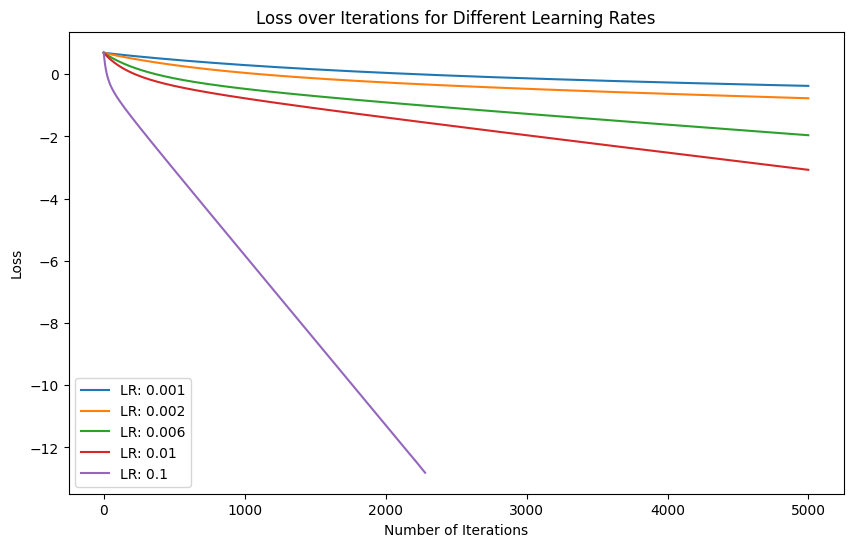

In [12]:
# learning rates as given in question
learning_rates = [0.001, 0.002, 0.006, 0.01, 0.1]
iterations = 5000

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    loss = logistic_regression(X, y, lr, iterations)
    plt.plot(range(iterations), loss, label=f'LR: {lr}')

plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Different Learning Rates')
plt.legend()
plt.savefig('loss_comparison.png')
plt.show()

## Q2

In [13]:
X_train = train_data[:, :3]  # training features
y_train = train_data[:, 3]    # training target

X_test = test_data[:, :3]    # testing features
y_test = test_data[:, 3]     # testing target

In [14]:
# logistic regression using different gradient descent variants
def logistic_regression(X, y, learning_rate, iterations, variant="batch", batch_size=5):
    start_time = time.time()
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  # intercept term

    theta = np.zeros(n + 1)
    loss_history = []

    for i in range(iterations):
        if variant == "batch":
            predictions = sigmoid(np.dot(X, theta))
            error = predictions - y
            gradient = np.dot(X.T, error) / m
            theta -= learning_rate * gradient
        elif variant == "mini-batch":
            indices = np.random.choice(m, batch_size, replace=False)
            X_mini = X[indices]
            y_mini = y[indices]
            predictions = sigmoid(np.dot(X_mini, theta))
            error = predictions - y_mini
            gradient = np.dot(X_mini.T, error) / batch_size
            theta -= learning_rate * gradient
        elif variant == "stochastic":
            rand_index = np.random.randint(0, m)
            x_i = X[rand_index, :].reshape(1, -1)
            y_i = y[rand_index]
            prediction = sigmoid(np.dot(x_i, theta))
            error = prediction - y_i
            gradient = x_i.T * error
            theta -= learning_rate * gradient.reshape(-1)

        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        loss = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
        total_loss = np.mean(loss)
        loss_history.append(total_loss)

    end_time = time.time()
    time_taken = end_time - start_time
    return theta, loss_history, time_taken

In [15]:
# perform logistic regression for each variant
learning_rate = 0.1
iterations = 300000

# batch gradient descent
theta_batch, loss_history_batch, time_taken_batch = logistic_regression(X_train, y_train, learning_rate, iterations, "batch")

# mini-batch gradient descent
theta_mini_batch, loss_history_mini_batch, time_taken_mini_batch = logistic_regression(X_train, y_train, learning_rate, iterations, "mini-batch", batch_size=5)

# stochastic gradient descent
theta_stochastic, loss_history_stochastic, time_taken_stochastic = logistic_regression(X_train, y_train, learning_rate, iterations, "stochastic")

<ipython-input-14-9e45bfa687f0>:35: RuntimeWarning: divide by zero encountered in log
  loss = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
<ipython-input-14-9e45bfa687f0>:35: RuntimeWarning: invalid value encountered in multiply
  loss = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))


In [17]:
# prediction
def predict(X, theta):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # intercept term
    return sigmoid(np.dot(X, theta))

# accuracy
def calculate_accuracy(y_true, y_pred):
    y_pred_class = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(y_pred_class == y_true)
    return accuracy

In [18]:
# getting predictions on training and test data
y_train_pred_batch = predict(X_train, theta_batch)
y_test_pred_batch = predict(X_test, theta_batch)

y_train_pred_mini_batch = predict(X_train, theta_mini_batch)
y_test_pred_mini_batch = predict(X_test, theta_mini_batch)

y_train_pred_stochastic = predict(X_train, theta_stochastic)
y_test_pred_stochastic = predict(X_test, theta_stochastic)

# calculate accuracy
accuracy_train_batch = calculate_accuracy(y_train, y_train_pred_batch)
accuracy_test_batch = calculate_accuracy(y_test, y_test_pred_batch)

accuracy_train_mini_batch = calculate_accuracy(y_train, y_train_pred_mini_batch)
accuracy_test_mini_batch = calculate_accuracy(y_test, y_test_pred_mini_batch)

accuracy_train_stochastic = calculate_accuracy(y_train, y_train_pred_stochastic)
accuracy_test_stochastic = calculate_accuracy(y_test, y_test_pred_stochastic)

In [19]:
print("Batch Gradient Descent:")
print(f"Time taken: {time_taken_batch} seconds")
print(f"Training data accuracy: {accuracy_train_batch}")
print(f"Test data accuracy: {accuracy_test_batch}\n")

print("Mini-batch Gradient Descent:")
print(f"Time taken: {time_taken_mini_batch} seconds")
print(f"Training data accuracy: {accuracy_train_mini_batch}")
print(f"Test data accuracy: {accuracy_test_mini_batch}\n")

print("Stochastic Gradient Descent:")
print(f"Time taken: {time_taken_stochastic} seconds")
print(f"Training data accuracy: {accuracy_train_stochastic}")
print(f"Test data accuracy: {accuracy_test_stochastic}\n")

Batch Gradient Descent:
Time taken: 43.84051775932312 seconds
Training data accuracy: 0.998998998998999
Test data accuracy: 1.0

Mini-batch Gradient Descent:
Time taken: 66.82519912719727 seconds
Training data accuracy: 0.996996996996997
Test data accuracy: 1.0

Stochastic Gradient Descent:
Time taken: 46.40129113197327 seconds
Training data accuracy: 0.992992992992993
Test data accuracy: 1.0

